# Page View Time Series Visualizer

In [381]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()

# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv('fcc-forum-pageviews.csv')
df['date'] = pd.to_datetime(df.date)
df = df.set_index('date')

# Clean data
df = df[(df['value'] > (df.value.quantile(0.025)))
        & (df['value'] < (df.value.quantile(0.975)))]


def draw_line_plot():
  # Draw line plot

  fig, ax = plt.subplots(figsize=(8, 4))
  ax.plot(df, color='red', linewidth=0.7)
  ax.set_xlabel('Date', loc='center', fontsize=5)
  ax.set_ylabel('Page Views', fontsize=5)
  ax.tick_params(axis='both', labelsize=6)
  #plt.title(fontsize = 6)
  ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019',
               fontsize=6)

  # Save image and return fig (don't change this part)
  fig.savefig('line_plot.png')
  return fig


def draw_bar_plot():
  df = pd.read_csv('fcc-forum-pageviews.csv')
  df['date'] = pd.to_datetime(df.date)
  df = df.set_index('date')

  # Clean data
  df = df[(df['value'] > (df.value.quantile(0.025)))
          & (df['value'] < (df.value.quantile(0.975)))]

  df['month'] = df.index.month_name()
  df['year'] = df.index.year

  month_order = [
    'January',
    'February',
    'March',
    'April',
    'May',
    'June',
    'July',
    'August',
    'September',
    'October',
    'November',
    'December',
  ]

  gg = df.pivot_table(index='year', columns='month', values='value')
  gg = gg.reindex(columns=month_order)
  fig, ax = plt.subplots(figsize=(10, 7))
  gg.plot(kind='bar', ax=ax)
  ax.set_xlabel('Years')
  ax.set_ylabel('Average Page Views')
  ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
  ax.legend(title='Months')

  # Save image and return fig (don't change this part)
  fig.savefig('bar_plot.png')
  return fig


def draw_box_plot():
  # Prepare data for box plots (this part is done!)
  df_box = df.copy()
  df_box.reset_index(inplace=True)
  df_box['year'] = [d.year for d in df_box.date]
  df_box['month'] = [d.strftime('%b') for d in df_box.date]
  month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',\
                 'Oct', 'Nov', 'Dec']
  df_box['month_number'] = df_box.date.dt.month
  # Draw box plots (using Seaborn)

  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3), sharey=False)
  sns.boxplot(x = df_box['year'], y = df_box['value'], data = df_box, ax=ax1,\
              fliersize=1)
  sns.boxplot(x = df_box['month_number'], y = df_box['value'], data = df_box, ax=ax2,\
              fliersize=1)

  ax1.set_title('Year-wise Box Plot (Trend)', fontsize=7)
  ax2.set_title('Month-wise Box Plot (Seasonality)', fontsize=7)
  ax1.set_xlabel('Year', fontsize=6)
  ax1.set_ylabel('Page Views', fontsize=6)
  ax2.set_xlabel('Month', fontsize=6)
  ax2.set_ylabel('Page Views', fontsize=6)
  ax1.tick_params(axis='both', labelsize=6)
  ax2.tick_params(axis='both', labelsize=6)
  ax1.set_yticks(range(0, 210000, 20000))
  ax2.set_yticks(range(0, 210000, 20000))
  ax2.set_xticklabels(month_order)

  # Save image and return fig (don't change this part)
  fig.savefig('box_plot.png')
  return fig


Figure(1000x700)


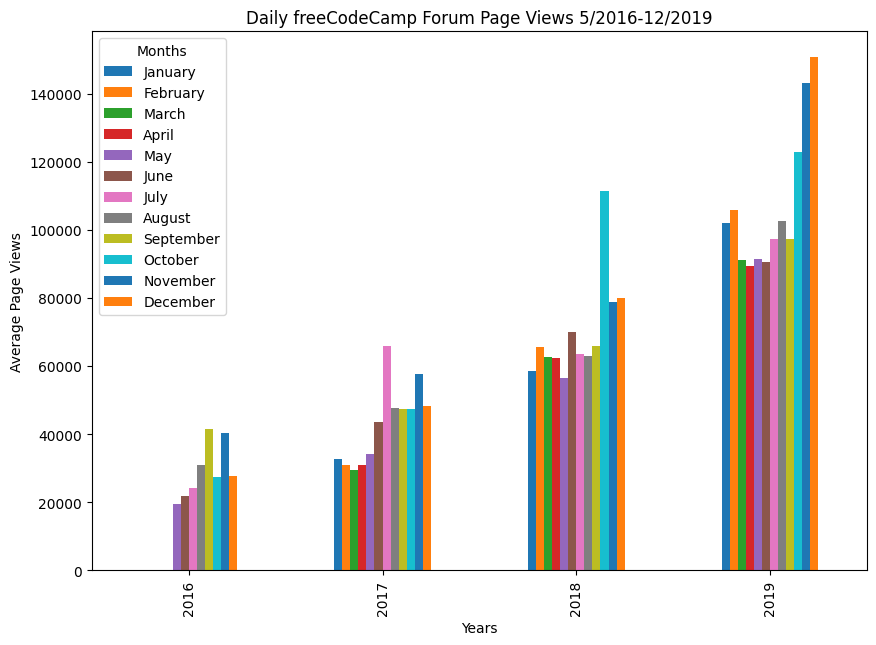

In [382]:
print(draw_bar_plot())

Figure(800x400)


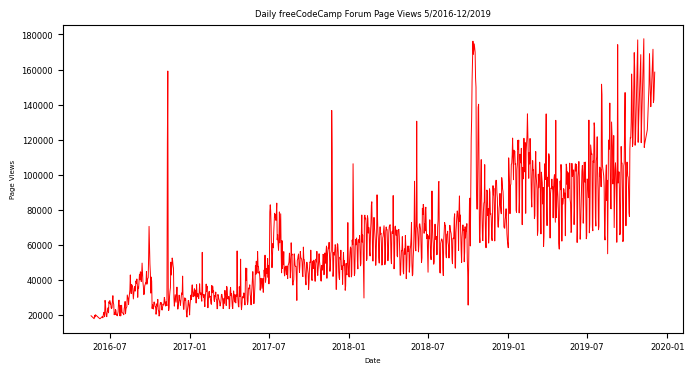

In [383]:
print(draw_line_plot())

Figure(1000x300)


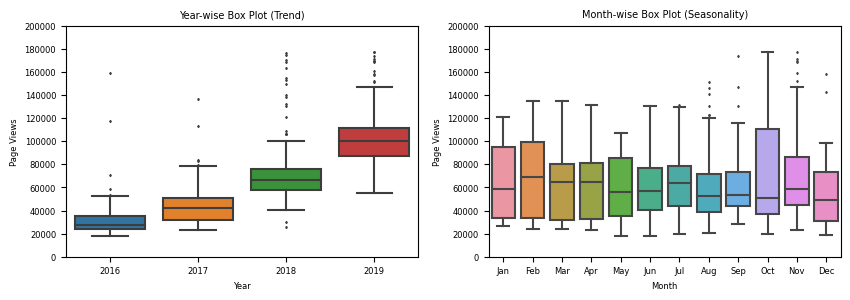

In [384]:
print(draw_box_plot())